In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

In [3]:
FILE_PATH = os.path.join(os.path.dirname(os.getcwd()), "data/sample_offical.in")

In [4]:
labels_features = {
    "delete": list(),
    "write": list(),
    "read": list()
}
with open(FILE_PATH, "r") as f:
    T, M, N, V, G = map(int, f.readline().split())
    for key in labels_features.keys():
        labels_features[key] = [[] for _ in range(M + 1)]
        for i in range(1, M + 1):
            labels_features[key][i] = [] + list(map(int, f.readline().split()))
            assert len(labels_features[key][i]) == (T - 1) // 1800 + 1

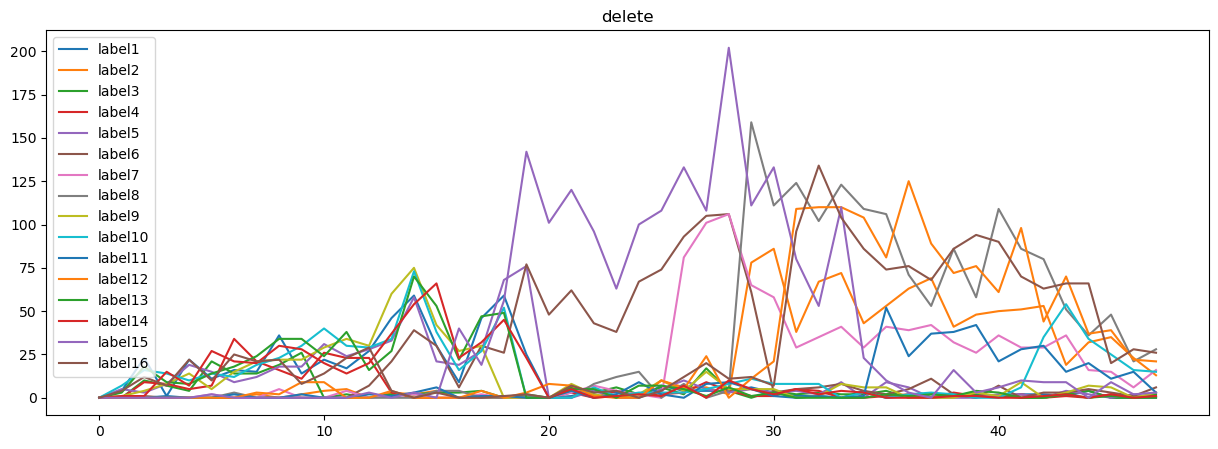

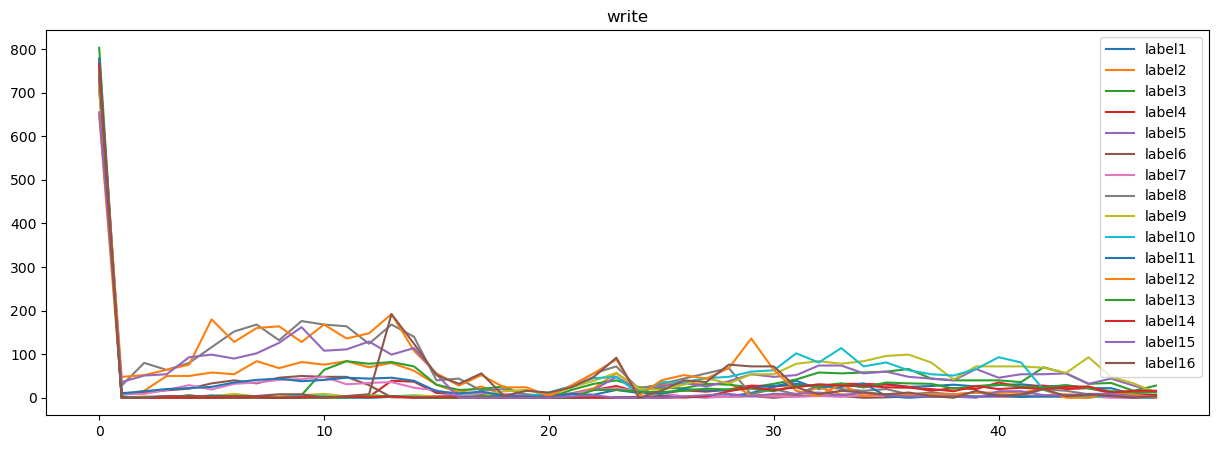

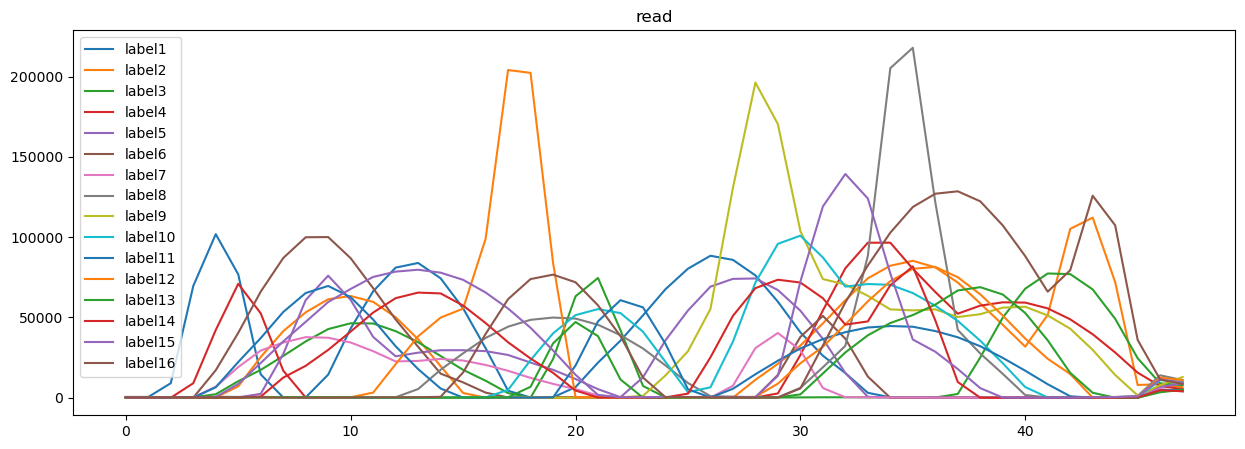

In [5]:
for key in labels_features.keys():
    plt.figure(figsize=(15, 5))
    for i in range(1, M + 1):
        plt.plot(labels_features[key][i], label=f"label{i}")
    plt.legend()
    plt.title(key)
    plt.show()

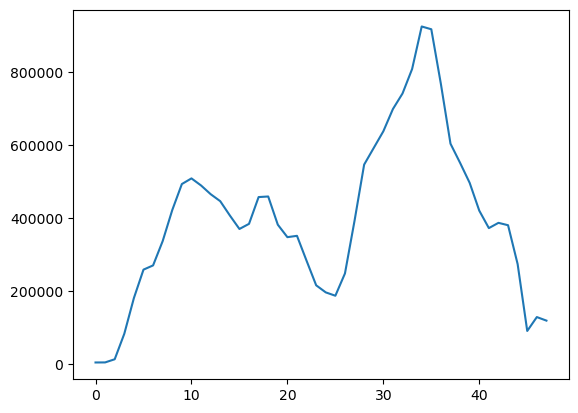

In [6]:
plt.plot(np.array(labels_features["read"][1:]).sum(axis=0))
plt.show()

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

# 将下面这个矩阵进行聚类
reference_series = labels_features["read"][1:]

# 先进行归一化
reference_series = np.array(reference_series)
reference_series = reference_series / reference_series.max(axis=1)[:, None]

# 对特征进行 L2 归一化
acf_features_normalized = normalize(reference_series, norm='l2')

# 使用 KMeans 进行聚类
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10).fit(reference_series)

# 转化为聚类的结果，每一类对应的序列
clustered_series = [[] for _ in range(5)]
for i, label in enumerate(kmeans.labels_):
    clustered_series[label].append(reference_series[i])

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


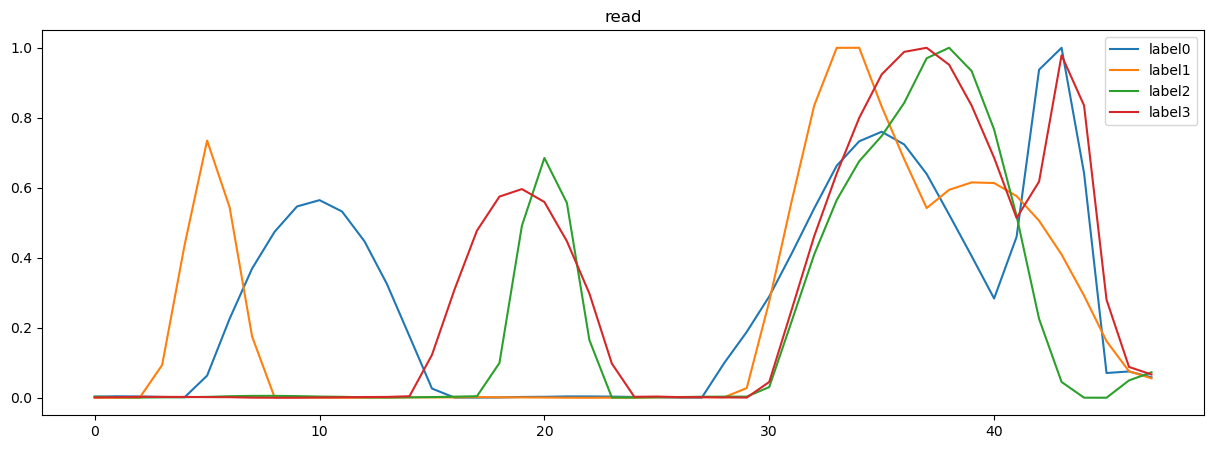

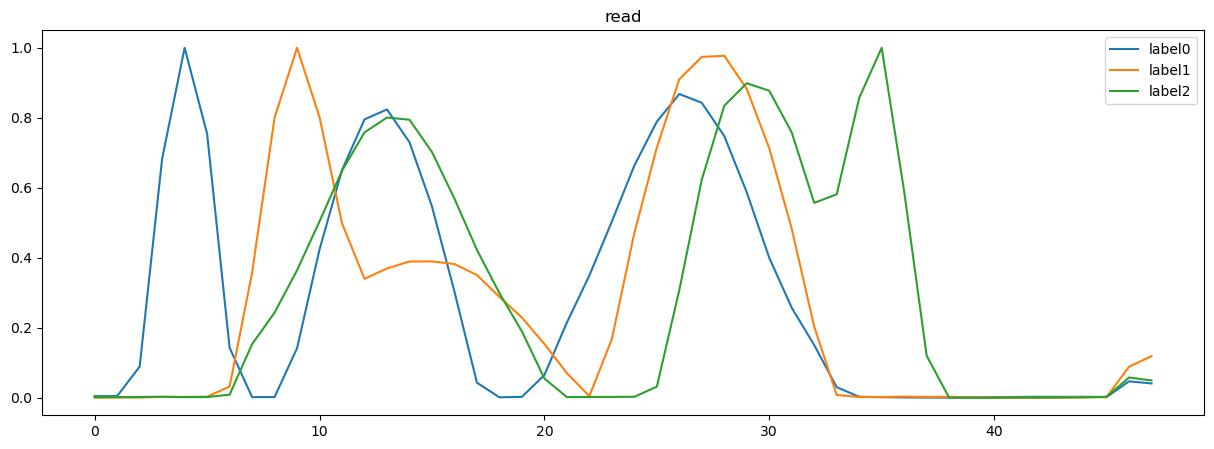

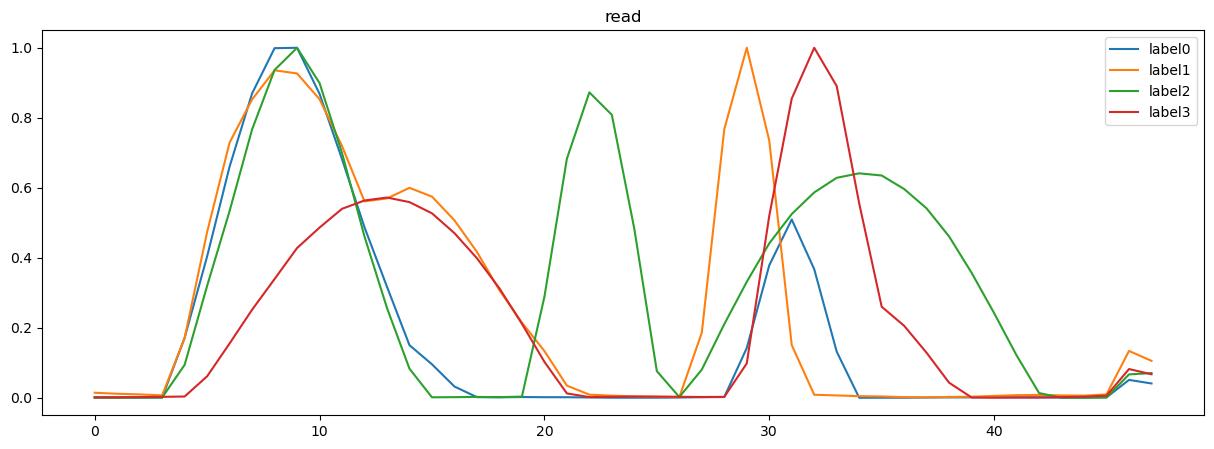

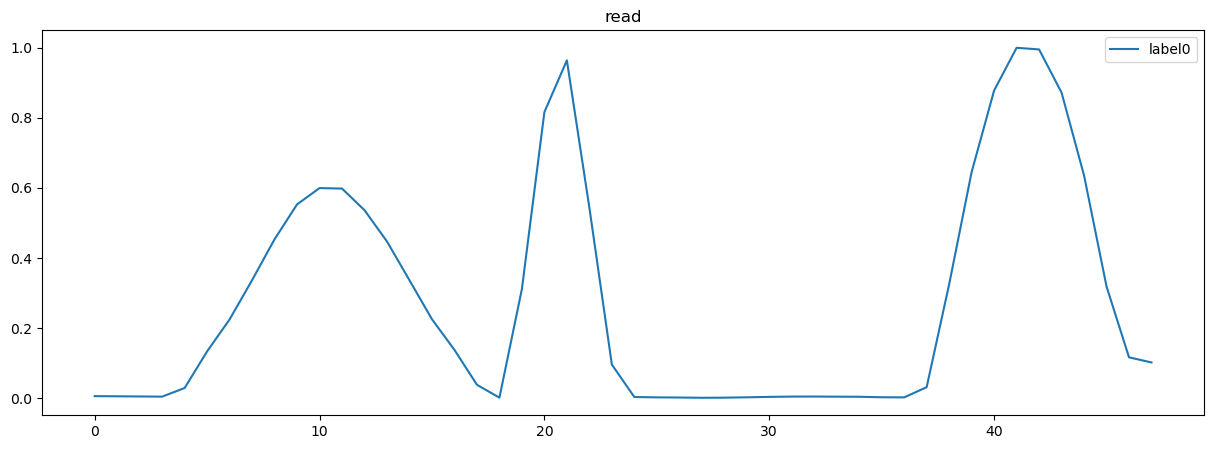

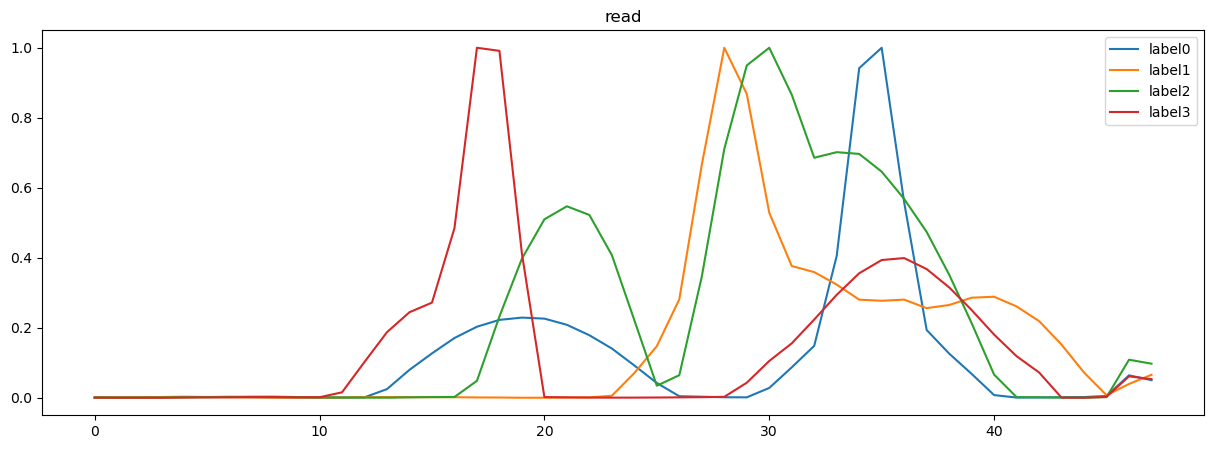

In [8]:
for i in range(len(clustered_series)):
    plt.figure(figsize=(15, 5))
    for j in range(len(clustered_series[i])):
        plt.plot(clustered_series[i][j], label=f"label{j}")
    plt.legend()
    plt.title(key)
    plt.show()

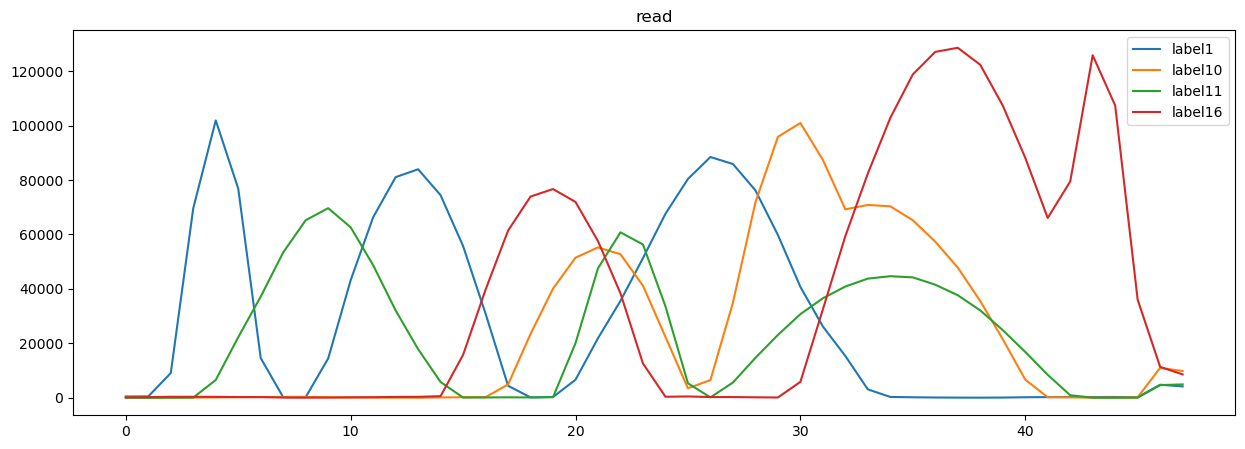

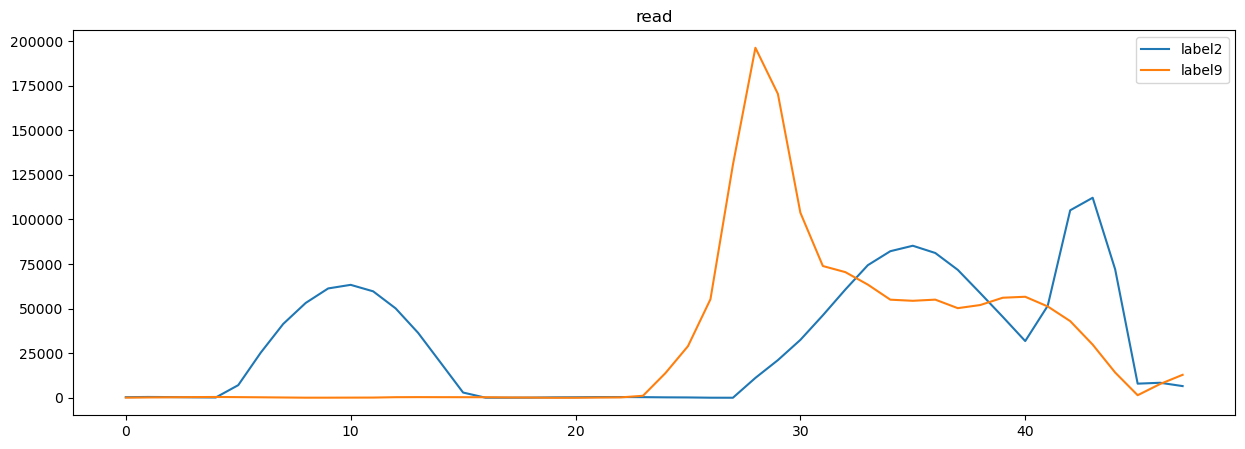

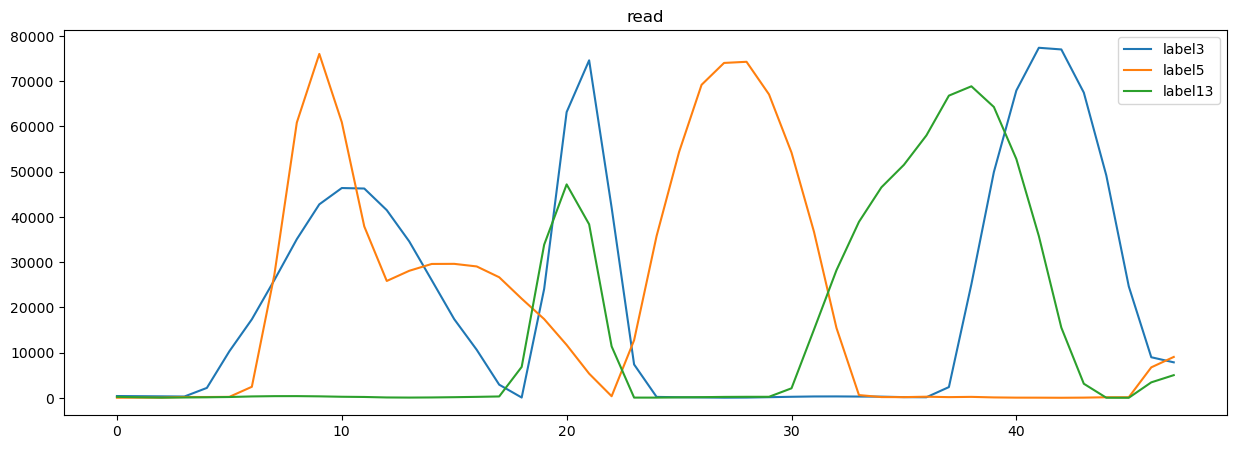

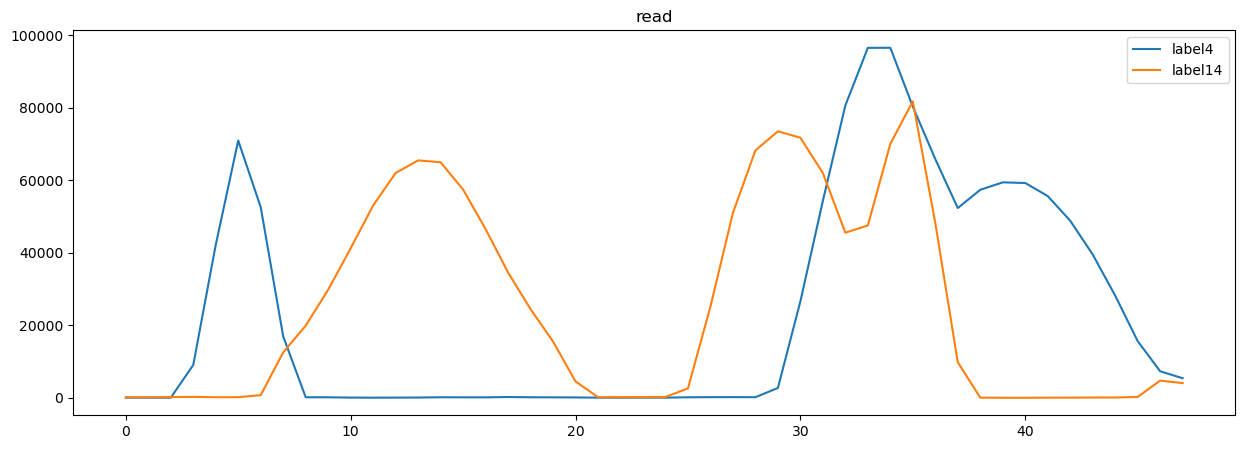

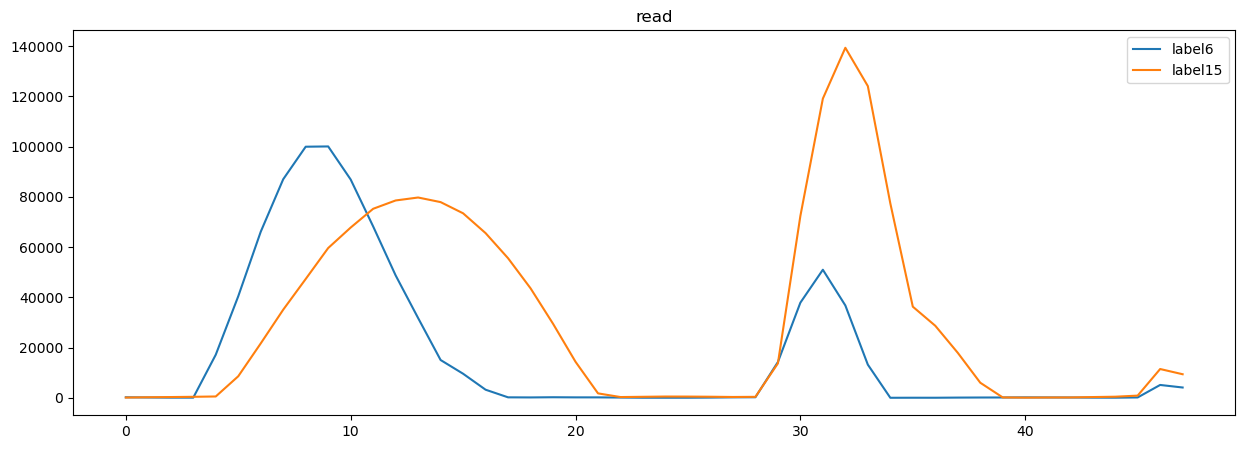

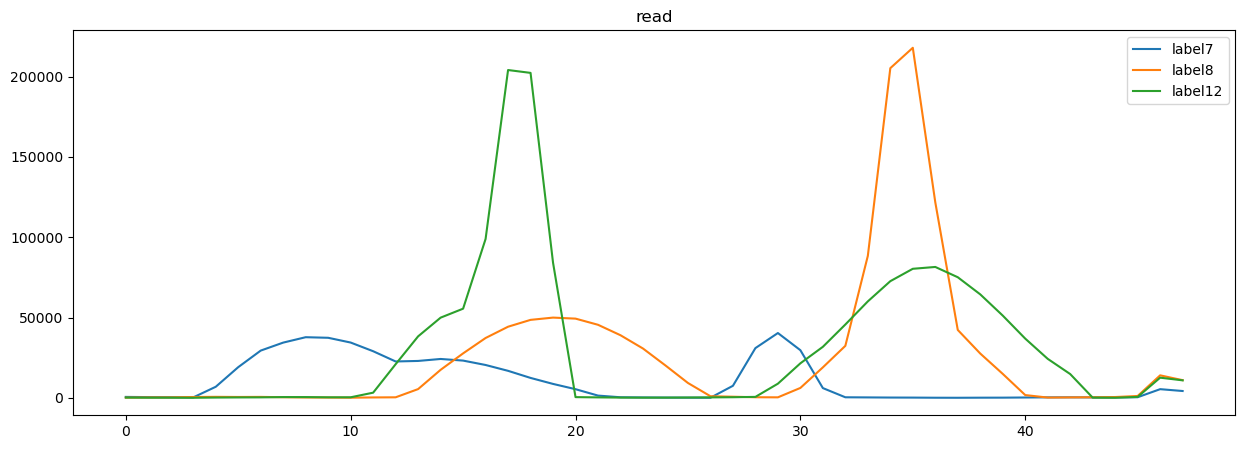

In [9]:
s = "1 2 3 4 3 5 6 6 2 1 1 6 3 4 5 1"
s = list(map(int, s.split()))
d = dict()
for i in range(1, max(s) + 1):
    d[i] = []
for i in range(len(s)):
    d[s[i]].append(i + 1)
for i in d.keys():
    plt.figure(figsize=(15, 5))
    for j in d[i]:
        plt.plot(labels_features["read"][j], label=f"label{j}")
    plt.legend()
    plt.title(key)
    plt.show()

In [10]:
len(list(zip(labels_features["read"])))

17

In [11]:
# 统计每个label的数量
write_sum = [sum(x) for x in labels_features["write"]][1:]
read_sum = [sum(x) for x in labels_features["read"]][1:]
delete_sum = [sum(x) for x in labels_features["delete"]][1:]

<Figure size 1500x500 with 0 Axes>

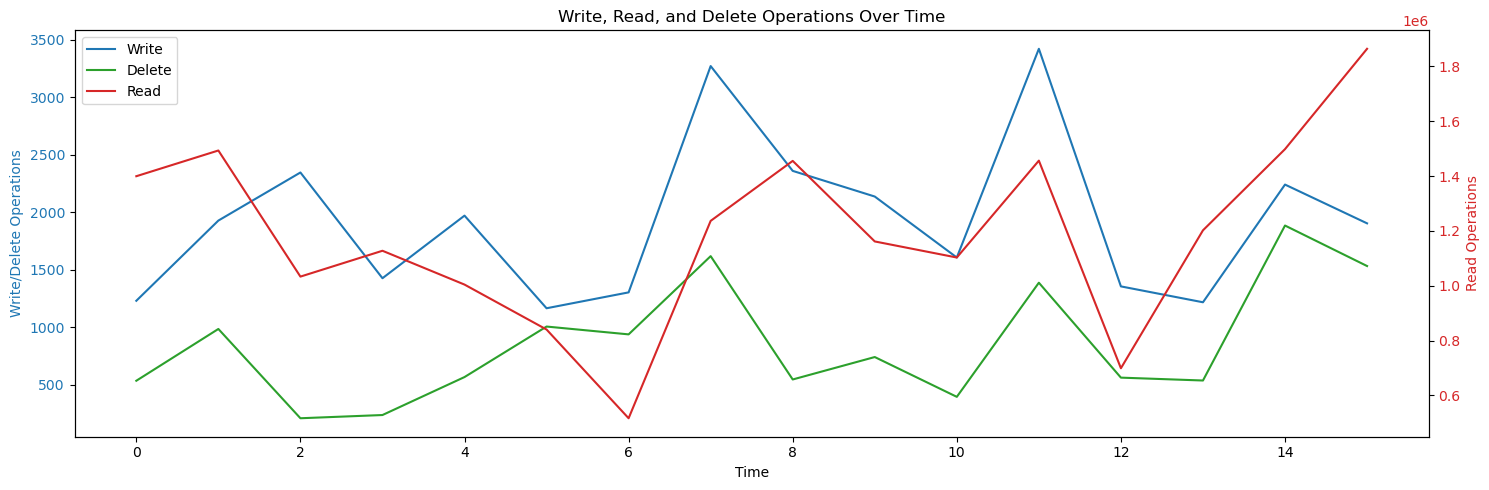

In [12]:
plt.figure(figsize=(15, 5))

# Create a figure with two y-axes for different scales
fig, ax1 = plt.subplots(figsize=(15, 5))

# First y-axis for write and delete operations
color = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('Write/Delete Operations', color=color)
ax1.plot(write_sum, color='tab:blue', label="Write")
ax1.plot(delete_sum, color='tab:green', label="Delete")
ax1.tick_params(axis='y', labelcolor=color)

# Second y-axis for read operations
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Read Operations', color=color)
ax2.plot(read_sum, color=color, label="Read")
ax2.tick_params(axis='y', labelcolor=color)

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title("Write, Read, and Delete Operations Over Time")
plt.tight_layout()
plt.show()


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


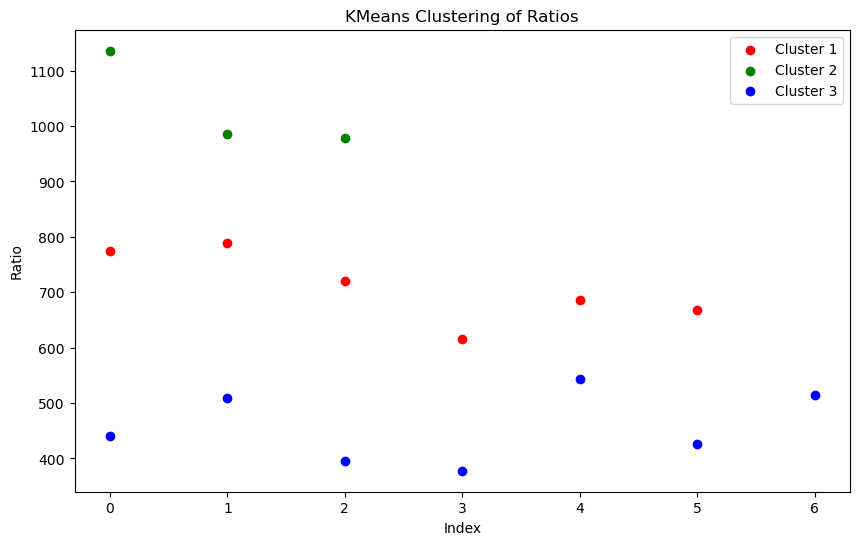

In [13]:
from sklearn.cluster import KMeans

# 将 ratio 列表转换为 numpy 数组
ratio = [r / w for r, w in zip(read_sum, write_sum)]
ratio_array = np.array(ratio).reshape(-1, 1)

# 使用 KMeans 进行聚类
kmeans = KMeans(n_clusters=3, random_state=0).fit(ratio_array)
labels = kmeans.labels_

# 绘制散点图
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b']
for i in range(3):
    cluster_points = ratio_array[labels == i]
    plt.scatter(range(len(cluster_points)), cluster_points, c=colors[i], label=f'Cluster {i+1}')

plt.xlabel('Index')
plt.ylabel('Ratio')
plt.title('KMeans Clustering of Ratios')
plt.legend()
plt.show()

In [14]:
sum(write_sum) * 3, sum(read_sum) * 3, sum(delete_sum) * 3

(92712, 57275304, 41133)

In [15]:
N * V

57540

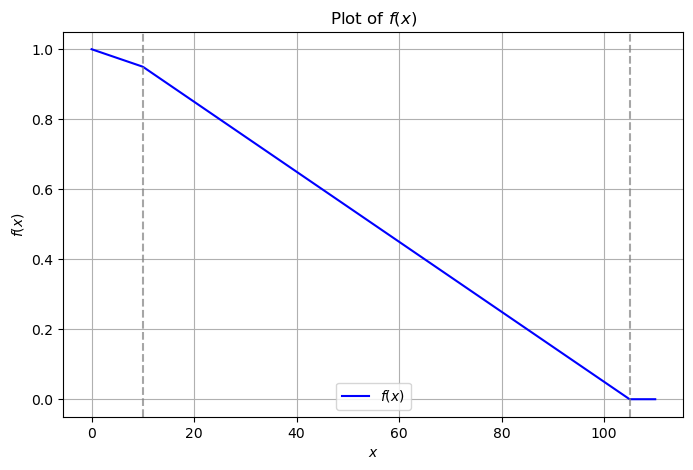

In [16]:
# 定义分段函数
def f(x):
    if 0 <= x <= 10:
        return -0.005*x + 1
    elif 10 < x <= 105:
        return -0.01*x + 1.05
    else:
        return 0

# 生成 x 值
x_values = np.linspace(0, 110, 500)  # 从 0 到 110 取 500 个点
y_values = [f(x) for x in x_values]  # 计算对应的 y 值

# 绘制曲线
plt.figure(figsize=(8, 5))
plt.plot(x_values, y_values, label=r'$f(x)$', color='b')

# 标注分段点
plt.axvline(10, linestyle='--', color='gray', alpha=0.7)
plt.axvline(105, linestyle='--', color='gray', alpha=0.7)

# 设置标题和标签
plt.title(r'Plot of $f(x)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.legend()
plt.grid(True)

# 显示图像
plt.show()